
![title](Figure2-1.jpg)


The image shows a pair of “moons” facing each other in an asymmetrically arranged manner. The moon labeled “Region A” is positioned symmetrically with respect to the y-axis, whereas the moon labeled “Region B” is displaced to the right of the y-axis by an amount equal to the radius r and below the x-axis by the distance d. The two moons have identical parameters: 

Radius of each moon, r = 10, 

Width of each moon, w = 6. 

The vertical distance d separating the two moons is adjustable; it is measured with respect to the x-axis, as indicated in the figure 

i) Increasingly positive values of d signify increased separation between the two moons; 

ii) Increasingly negative values of d signify the two moons’ coming closer to each other. 

The training sample consists of 1000 pairs of data points, with each pair consisting of one point picked from region A and another point picked from region B, both randomly. The test sample consists of 3,000 pairs of data points, again picked in a random manner. 

Tasks: 

Your task is to classify the dataset using SVM (Support Vector Machine) for some cases given below. Generate the dataset for each case and classify using different kernels (e.g. linear, polynomial, radial basis etc.) Show the decision boundary (Plotting the classified points using different color will be enough) 

Case 1: d = 0 

Case 2: |d| = 1/2 * (radius of moon’s inner half-circle) and d is negative i.e. d is in the upper side of x-axis. 

Case 3: Increase d negatively such that both of the moons touch each other. 

Case 4: Both moons overlap each other 

Case 5: Add some noise in the training set 

/home/bhargavi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/bhargavi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


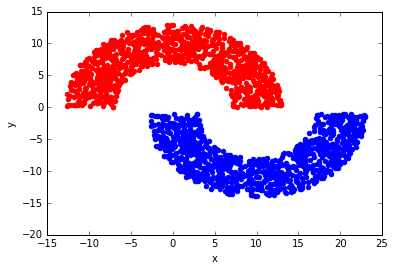

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Default parameters
r=10
d=1
N=1000
w=6

#Generate region A
x=np.random.uniform(-r-w/2,r+w/2,10000)
y=np.random.uniform(0,r+w/2,10000)
dist=np.sqrt(x*x+y*y)

num=0
i=0
ind_list=[]
while num<1000:
    #select points inside circular region of width w
    if dist[i]<r+w/2 and dist[i]>r-w/2:
        num+=1
        ind_list=np.append(ind_list,i)
    i+=1

x_up=np.array([])
y_up=np.array([])
for i in range(1000):
    x_up= np.append(x_up,x[ind_list[i]])
    y_up= np.append(y_up,y[ind_list[i]])
    
#Generate region B
x_down=x_up+r
y_down=-y_up-d

#Plot data
plt.scatter(x_down,y_down,color='b')
plt.scatter(x_up,y_up,color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [31]:
#prepare data

data0 = np.vstack((x_up,y_up))
data1 = np.vstack((x_down,y_down))
X= np.hstack((data0,data1))
Y=np.hstack((np.zeros(np.shape(data0)[1]),np.ones(np.shape(data1)[1])))


from sklearn.svm import SVC
#classifier instantiation
clf= SVC(kernel='linear')
clf.fit(X.T,Y)
clf.predict(np.array([4,-3]))

/home/bhargavi/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1.])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/home/bhargavi/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1.])